In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import os
%matplotlib inline

In [27]:
def rescale_image(image, percent=75):
    width  = int(image.shape[1] * percent/ 100)
    height = int(image.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation =cv2.INTER_AREA)

--- 0.0031468868255615234 seconds ---
Number of Keypoints Detected In The Training Image:  133


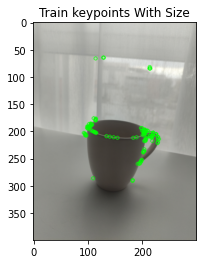

In [28]:
# load image tasse1
image1 = cv2.imread('./tasse/tasse1.jpg')

# lower resolution 10 folds
image1 = rescale_image(image1, percent=10)

# convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# get orb features
orb = cv2.ORB_create()

t1 = time.time()
train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
t2 = time.time()
print("--- %s seconds ---" % (t2 - t1))

keypoints_without_size = np.copy(training_image)
cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

plt.imshow(keypoints_without_size, cmap='gray')
plt.title("Train keypoints With Size")

print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

--- 0.0032880306243896484 seconds ---
Number of Keypoints Detected In The testing Image:  140


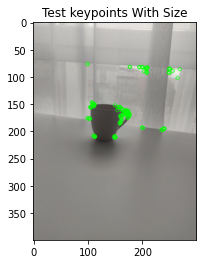

In [29]:
# load image tasse2
image2 = cv2.imread('./tasse/tasse2.jpg')

# lower resolution 10 folds
image2 = rescale_image(image2, percent=10)

# convert the training image to RGB
testing_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# convert the training image to gray scale
testing_gray = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)

t1 = time.time()
test_keypoints, test_descriptor = orb.detectAndCompute(testing_gray, None)
t2 = time.time()
print("--- %s seconds ---" % (t2 - t1))

keypoints_without_size = np.copy(testing_image)
cv2.drawKeypoints(testing_image, test_keypoints, keypoints_without_size, color = (0, 255, 0))

plt.imshow(keypoints_without_size, cmap='gray')
plt.title("Test keypoints With Size")

print("Number of Keypoints Detected In The testing Image: ", len(test_keypoints))

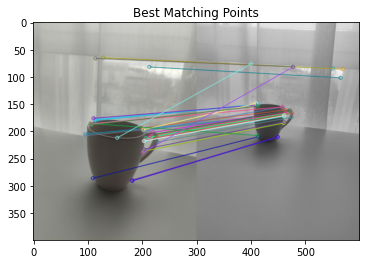


Number of Matching Keypoints Between The Training and Query Images:  34


In [30]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, testing_gray, test_keypoints, matches, testing_gray, flags = 2)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

--- 0.0021622180938720703 seconds ---


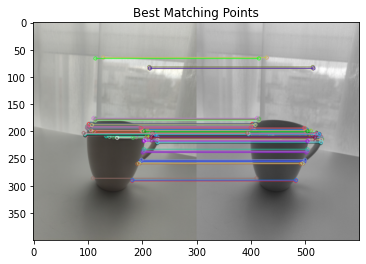


Number of Matching Keypoints Between The Training and Query Images:  133
--- 0.002094268798828125 seconds ---


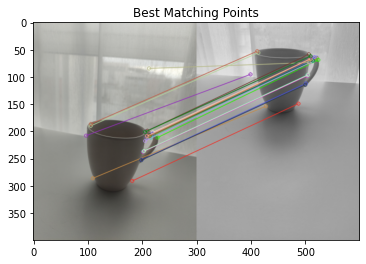


Number of Matching Keypoints Between The Training and Query Images:  25
--- 0.0022704601287841797 seconds ---


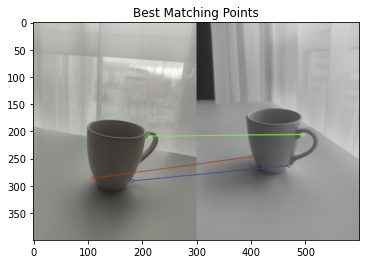


Number of Matching Keypoints Between The Training and Query Images:  4
--- 0.0018281936645507812 seconds ---


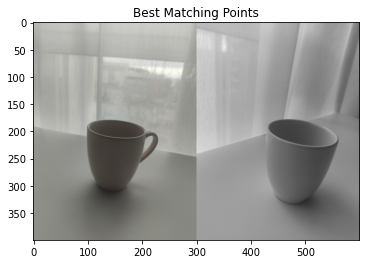


Number of Matching Keypoints Between The Training and Query Images:  0
--- 0.0029366016387939453 seconds ---


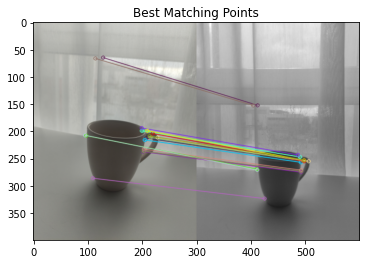


Number of Matching Keypoints Between The Training and Query Images:  20
--- 0.0018880367279052734 seconds ---


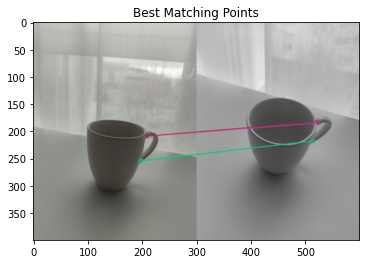


Number of Matching Keypoints Between The Training and Query Images:  4
--- 0.0022842884063720703 seconds ---


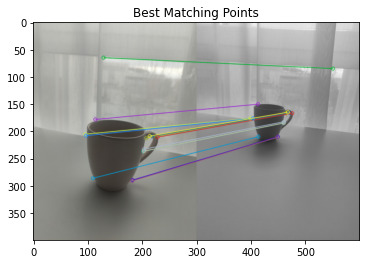


Number of Matching Keypoints Between The Training and Query Images:  14


In [48]:
directory = 'tasse'
for files in os.listdir(directory):
    if files.endswith('jpg'):
        image = cv2.imread(directory+'/'+files)
        image = rescale_image(image, percent=10)
        testing_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        testing_gray  = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)
        
        t1 = time.time()
        test_keypoints, test_descriptor = orb.detectAndCompute(testing_gray, None)
        t2 = time.time()
        print("--- %s seconds ---" % (t2 - t1))
        
        matches = bf.match(train_descriptor, test_descriptor)
        matches = sorted(matches, key = lambda x : x.distance)
        
        good_matches = list()
        
        for m in matches:
            if m.distance < 50:
                good_matches.append(m)
                
        matches = good_matches
        
        result = cv2.drawMatches(training_image, train_keypoints, testing_gray, test_keypoints, matches, testing_gray, flags = 2)

        plt.title('Best Matching Points')
        plt.imshow(result)
        plt.show()

        print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    else:
        continue


0.4117647058823529


(array([2., 7., 0., 5., 5., 4., 4., 3., 2., 2.]),
 array([26. , 31.5, 37. , 42.5, 48. , 53.5, 59. , 64.5, 70. , 75.5, 81. ]),
 <BarContainer object of 10 artists>)

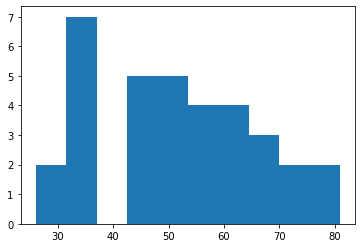

In [32]:
similar_regions = [i for i in matches if i.distance < 50]
print(len(similar_regions)/len(matches))
np.mean([i.distance for i in matches ])
plt.hist([i.distance for i in matches ])

--- 0.002209186553955078 seconds ---


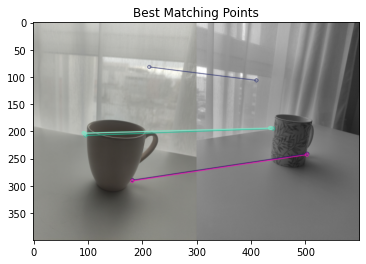


Number of Matching Keypoints Between The Training and Query Images:  6
--- 0.0020720958709716797 seconds ---


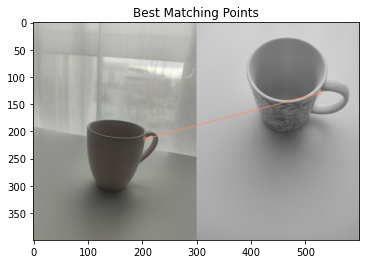


Number of Matching Keypoints Between The Training and Query Images:  1
--- 0.002000093460083008 seconds ---


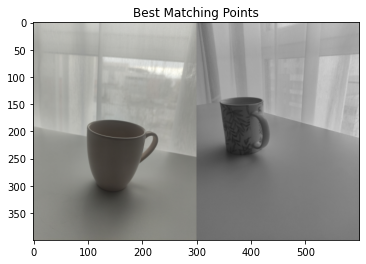


Number of Matching Keypoints Between The Training and Query Images:  0
--- 0.0019309520721435547 seconds ---


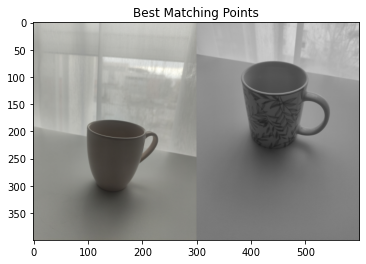


Number of Matching Keypoints Between The Training and Query Images:  0
--- 0.0021572113037109375 seconds ---


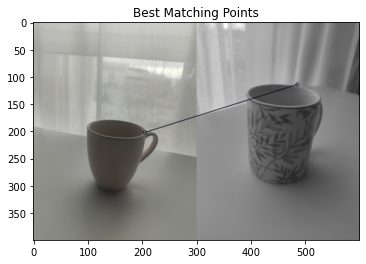


Number of Matching Keypoints Between The Training and Query Images:  1


In [49]:
directory = 'tasseg'
for files in os.listdir(directory):
    if files.endswith('jpg'):
        image = cv2.imread(directory+'/'+files)
        image = rescale_image(image, percent=10)
        testing_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        testing_gray  = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)
        
        t1 = time.time()
        test_keypoints, test_descriptor = orb.detectAndCompute(testing_gray, None)
        t2 = time.time()
        print("--- %s seconds ---" % (t2 - t1))
        
        matches = bf.match(train_descriptor, test_descriptor)
        matches = sorted(matches, key = lambda x : x.distance)
        
        good_matches = list()
        
        for m in matches:
            if m.distance < 50:
                good_matches.append(m)
                
        matches = good_matches
        
        result = cv2.drawMatches(training_image, train_keypoints, testing_gray, test_keypoints, matches, testing_gray, flags = 2)

        plt.title('Best Matching Points')
        plt.imshow(result)
        plt.show()

        print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    else:
        continue


--- 0.002570629119873047 seconds ---


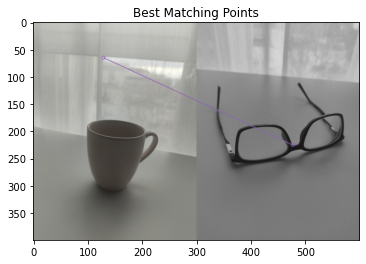


Number of Matching Keypoints Between The Training and Query Images:  1
--- 0.0025250911712646484 seconds ---


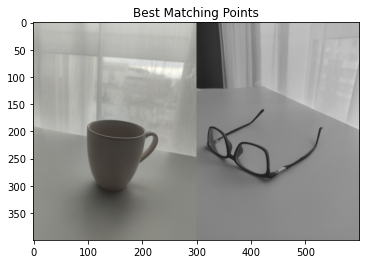


Number of Matching Keypoints Between The Training and Query Images:  0
--- 0.003046751022338867 seconds ---


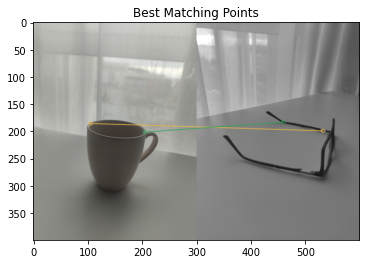


Number of Matching Keypoints Between The Training and Query Images:  2
--- 0.0024566650390625 seconds ---


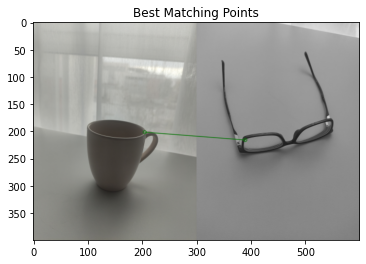


Number of Matching Keypoints Between The Training and Query Images:  1
--- 0.002780914306640625 seconds ---


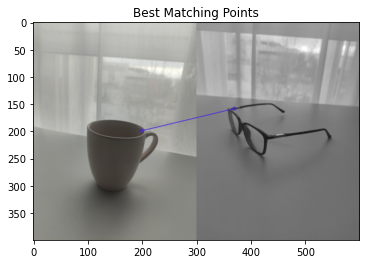


Number of Matching Keypoints Between The Training and Query Images:  1


In [54]:
directory = 'lunette'
for files in os.listdir(directory):
    if files.endswith('jpg'):
        image = cv2.imread(directory+'/'+files)
        image = rescale_image(image, percent=10)
        testing_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        testing_gray  = cv2.cvtColor(testing_image, cv2.COLOR_RGB2GRAY)
        
        t1 = time.time()
        test_keypoints, test_descriptor = orb.detectAndCompute(testing_gray, None)
        t2 = time.time()
        print("--- %s seconds ---" % (t2 - t1))
        
        matches = bf.match(train_descriptor, test_descriptor)
        matches = sorted(matches, key = lambda x : x.distance)
        
        good_matches = list()
        
        for m in matches:
            if m.distance < 50:
                good_matches.append(m)
                
        matches = good_matches
                
        result = cv2.drawMatches(training_image, train_keypoints, testing_gray, test_keypoints, matches, testing_gray, flags = 2)

        plt.title('Best Matching Points')
        plt.imshow(result)
        plt.show()

        print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))
    else:
        continue


In [55]:
similar_regions = [i for i in good_matches if i.distance < 50]
print(len(similar_regions)/len(good_matches))

1.0
